In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize

-----------------------

### Efficient Frontier and Tangency Portfolio Analysis 
-----------

### Portfolio of Domestic Stocks + Risk-free security (TBILL)

In [76]:
JYOTHILAB = yf.download("JYOTHYLAB.NS",start='2023-03-31',end='2024-04-01')['Adj Close']

AJANTPHARM = yf.download("AJANTPHARM.NS",start='2023-03-31',end='2024-04-01')['Adj Close']

PATANJALI = yf.download("PATANJALI.NS",start='2023-03-31',end='2024-04-01')['Adj Close']

TATASTEEL = yf.download("TATASTEEL.NS",start='2023-03-31',end='2024-04-01')['Adj Close']

EIDPARRY = yf.download("EIDPARRY.NS",start='2023-03-31',end='2024-04-01')['Adj Close']

GLS = yf.download("GLS.BO",start='2023-03-31',end='2024-04-01')['Adj Close']

INDIACEM = yf.download("INDIACEM.NS",start='2023-03-31',end='2024-04-01')['Adj Close']

TBILL = pd.read_csv("India 1-Year Bond Yield Historical Data.csv")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [77]:
TBILL['Date'] = pd.to_datetime(TBILL['Date'], format='%d-%m-%Y')
TBILL.set_index('Date', inplace=True)
TBILL = TBILL.sort_index()
TBILL = TBILL["Price"]
TBILL

Date
2023-04-03    7.124
2023-04-05    7.114
2023-04-06    6.950
2023-04-10    6.920
2023-04-11    6.935
              ...  
2024-03-21    7.084
2024-03-22    7.099
2024-03-26    7.107
2024-03-27    7.089
2024-03-28    6.975
Name: Price, Length: 240, dtype: float64

In [78]:
portfolio = pd.concat([JYOTHILAB,PATANJALI,AJANTPHARM,TATASTEEL,EIDPARRY,GLS,INDIACEM, TBILL],axis=1)
portfolio.columns = ['JYOTHILAB','PATANJALI','AJANTPHARM','TATASTEEL', 'EIDPARRY','GLS','INDIACEM', 'TBILL']

In [79]:
portfolio

,JYOTHILAB,PATANJALI,AJANTPHARM,TATASTEEL,EIDPARRY,GLS,INDIACEM,TBILL
Date,,,,,,,,
2023-03-31,186.474670,960.443848,1184.466797,99.198479,461.239014,378.407928,185.050003,NaN
2023-04-03,184.516937,975.258789,1203.868164,98.818771,467.881561,390.486816,187.149994,7.124
2023-04-05,192.005280,958.362732,1237.722656,99.530724,477.377899,392.129547,187.449997,7.114
2023-04-06,191.466919,957.470947,1246.639404,99.056084,483.577637,389.520508,187.699997,6.950
2023-04-10,190.536972,948.155823,1264.865112,99.625641,483.528442,394.786896,186.949997,6.920
...,...,...,...,...,...,...,...,...
2024-03-21,415.530121,1369.849976,2125.899902,147.135559,555.700012,747.500000,203.699997,7.084
2024-03-22,421.138672,1380.599976,2152.300049,148.801987,564.599976,754.200012,207.050003,7.099
2024-03-26,424.613007,1348.300049,2223.050049,149.390121,550.849976,758.000000,209.149994,7.107


In [80]:
portfolio_returns = portfolio.pct_change(1, fill_method=None).dropna()

Text(0.5, 1.0, 'Domestic Portfolio')

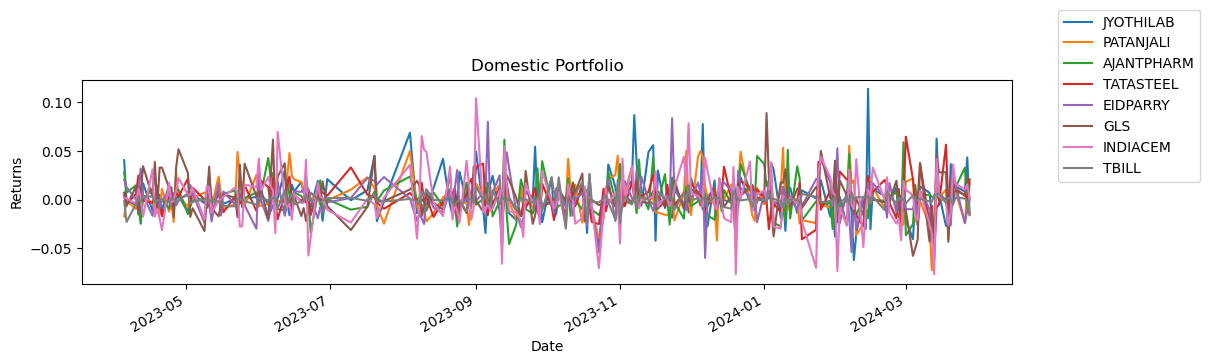

In [81]:
portfolio_returns.plot(figsize=(12,3))
plt.legend(loc=(1.05,0.5))
plt.ylabel('Returns')
plt.title('Domestic Portfolio')

#### Calculating Log returns

In [82]:
log_rets = np.log(1 + portfolio.pct_change(1, fill_method=None))
log_rets.dropna(inplace=True)
log_rets_cov = log_rets.cov() 

### Variance-Covariance Matrix

In [83]:
log_rets_cov

,JYOTHILAB,PATANJALI,AJANTPHARM,TATASTEEL,EIDPARRY,GLS,INDIACEM,TBILL
JYOTHILAB,0.000525,0.000109,0.000041,0.000039,0.000087,0.000075,0.000128,0.000017
PATANJALI,0.000109,0.000373,0.000031,0.000088,0.000076,0.000061,0.000151,0.000003
AJANTPHARM,0.000041,0.000031,0.000291,0.000024,0.000003,0.000031,0.000074,-0.000018
TATASTEEL,0.000039,0.000088,0.000024,0.000230,0.000056,0.000040,0.000145,-0.000004
EIDPARRY,0.000087,0.000076,0.000003,0.000056,0.000354,0.000064,0.000087,-0.000005
GLS,0.000075,0.000061,0.000031,0.000040,0.000064,0.000372,0.000115,0.000005
INDIACEM,0.000128,0.000151,0.000074,0.000145,0.000087,0.000115,0.000678,0.000021
TBILL,0.000017,0.000003,-0.000018,-0.000004,-0.000005,0.000005,0.000021,0.000046


### Weighted Returns

In [84]:
N = len(portfolio_returns.columns)
equal_weights = N*[1/N]

### Generating Random Weights


In [85]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights/ np.sum(weights)

### Portfolio Returns Function


In [86]:
def calculate_returns(weights,log_rets):
    return np.sum(log_rets.mean()*weights) * 252

### Portfolio Volatility Function

In [87]:
def calculate_volatility(weights,log_rets_cov):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [88]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(10000):
    # This may take awhile!
    weights = gen_weights(N=8)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights,log_rets))
    mc_portfolio_vol.append(calculate_volatility(weights,log_rets_cov))

In [89]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

### Efficient Frontier & Tangency Calculations

In [90]:
expected_returns_range = np.linspace(0.25, 0.6, 100)  # Adjusted based on your data
bounds = tuple((0, 1) for _ in range(N))  # Assuming no short-selling
frontier_volatility = []
frontier_weights = []

for possible_return in expected_returns_range:
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
                    {'type': 'eq', 'fun': lambda weights: calculate_returns(weights, log_rets) - possible_return})

    result = minimize(calculate_volatility, equal_weights, args=(log_rets_cov,), bounds=bounds, constraints=constraints)
    frontier_volatility.append(result['fun'])
    frontier_weights.append(result['x'])

risk_free_rate = 0.068  # Risk-free rate
frontier_sharpe_ratios = [(ret - risk_free_rate) / vol for ret, vol in zip(expected_returns_range, frontier_volatility)]


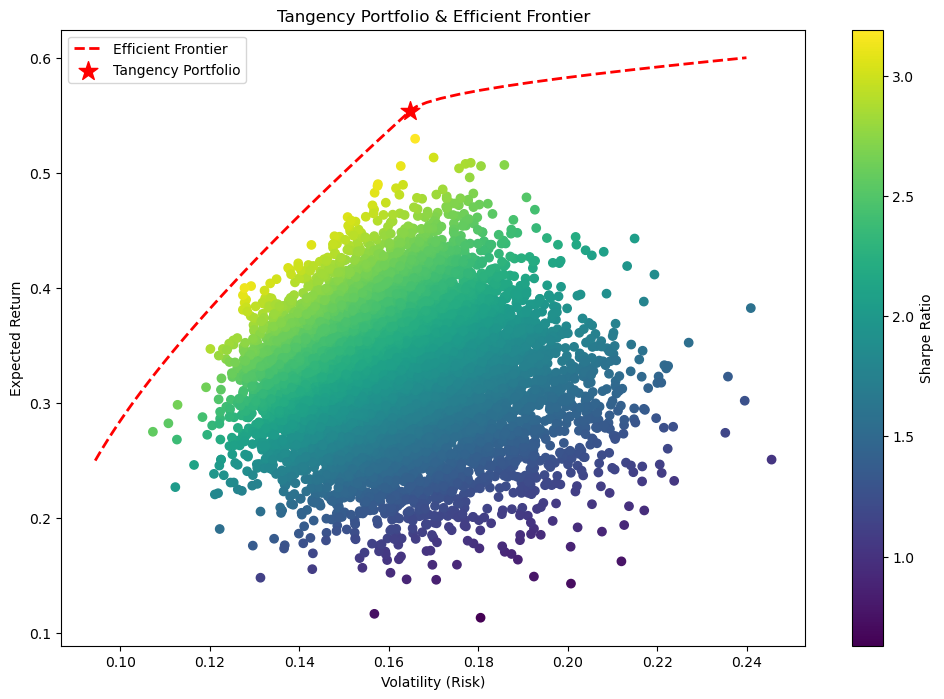

Tangency Portfolio Return: 0.554040404040404
Tangency Portfolio Volatility: 0.16484223345724355
Maximum Sharpe Ratio: 2.948518676595535


In [91]:
plt.figure(figsize=(12, 8))
plt.scatter(mc_portfolio_vol, mc_portfolio_returns, c=mc_sharpe_ratios, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')

# Plot the Efficient Frontier
plt.plot(frontier_volatility, expected_returns_range, 'r--', linewidth=2, label='Efficient Frontier')

# Tangency Portfolio Calculation
risk_free_rate = 0.068  

# Find the index of the maximum Sharpe ratio on the efficient frontier
max_sharpe_idx = np.argmax(frontier_sharpe_ratios)
tangency_volatility = frontier_volatility[max_sharpe_idx]
tangency_return = expected_returns_range[max_sharpe_idx]


# Highlight the Tangency Portfolio on the Efficient Frontier
plt.scatter(tangency_volatility, tangency_return, color='red', marker='*', s=200, label='Tangency Portfolio')

# Plot labels and legend
plt.legend()
plt.title('Tangency Portfolio & Efficient Frontier')
plt.show()

# Output Tangency Portfolio details
print(f"Tangency Portfolio Return: {tangency_return}")
print(f"Tangency Portfolio Volatility: {tangency_volatility}")
print(f"Maximum Sharpe Ratio: {frontier_sharpe_ratios[max_sharpe_idx]}")

In [92]:
 # Weights of Tangency Portfolio
tangency_weights = frontier_weights[max_sharpe_idx]
tangency_weights
# tangency_weights = mc_weights[np.argmax(mc_sharpe_ratios)]
# tangency_weights

array([1.17521566e-01, 0.00000000e+00, 2.94483750e-01, 3.50671524e-01,
       7.04731412e-18, 2.36638235e-01, 2.38524478e-17, 6.84925866e-04])

In [93]:
print(tangency_volatility)
print(tangency_return)
print(np.argmax(frontier_sharpe_ratios))

0.16484223345724355
0.554040404040404
86


-----------------------

### NIFTY 50 INDEX Fund Returns Analysis
-----------

In [94]:
INDEX = yf.download("^NSEI", start="2023-03-31", end="2024-04-01")

[*********************100%%**********************]  1 of 1 completed


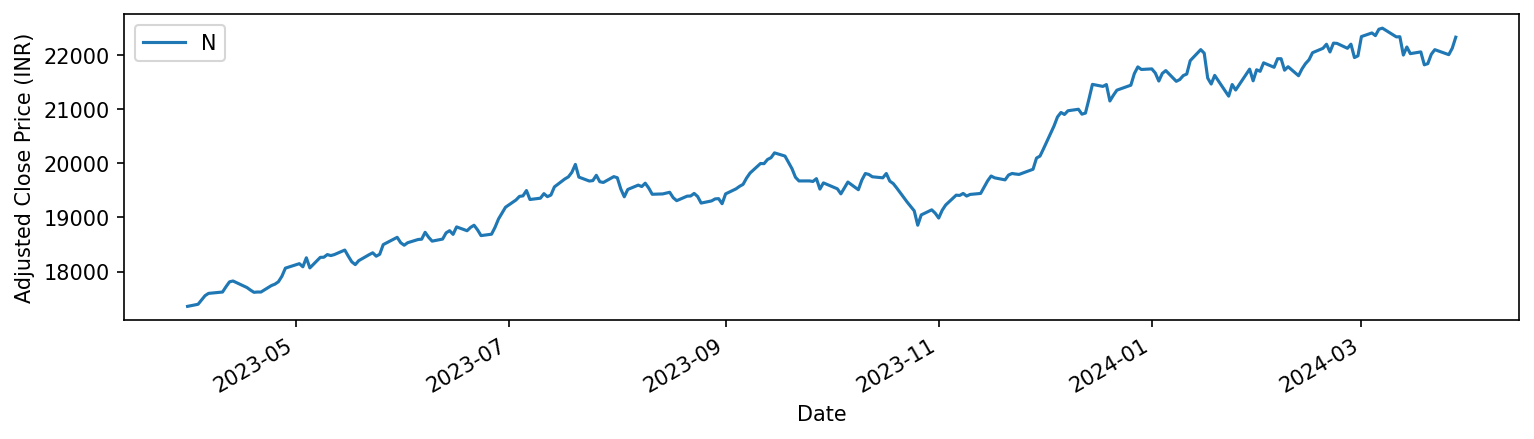

In [95]:
plt.figure(dpi=150)
INDEX['Adj Close'].plot(figsize=(12,3))
plt.ylabel("Adjusted Close Price (INR)")
plt.legend("NIFTY50")

In [96]:
def compute_sharpe_ratio(data, risk_free_rate = 0.000249931):
    mean_return = data["Adj Close"].pct_change(1).mean()
    std = data["Adj Close"].pct_change(1).std()
    sharpe_ratio = (mean_return-risk_free_rate) / std
    return (252**0.5) *sharpe_ratio

In [97]:
compute_sharpe_ratio(INDEX)

2.0529449337389094

### NIFTY50 Cummulative Returns

In [98]:
index_returns = INDEX["Adj Close"].pct_change(1).dropna()
index_cumm_returns = (index_returns + 1).cumprod()

Text(0.5, 1.0, 'NIFTY 50')

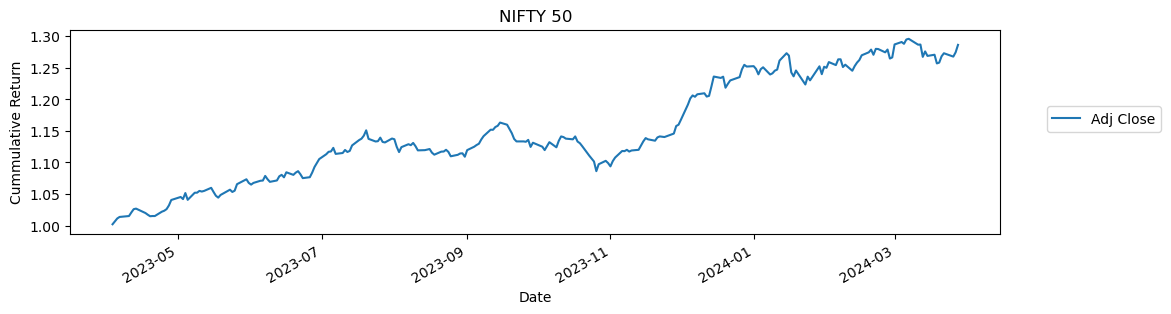

In [99]:
index_cumm_returns.plot(figsize=(12,3))
plt.legend(loc=(1.05,0.5))
plt.ylabel('Cummulative Return')
plt.title('NIFTY 50')

### Tangency Portfolio vs NIFTY50

In [100]:
weighted_returns = log_rets * tangency_weights
tangency_portfolio_daily_returns = weighted_returns.sum(axis=1)
tangency_cumulative_returns = (1 + tangency_portfolio_daily_returns).cumprod()

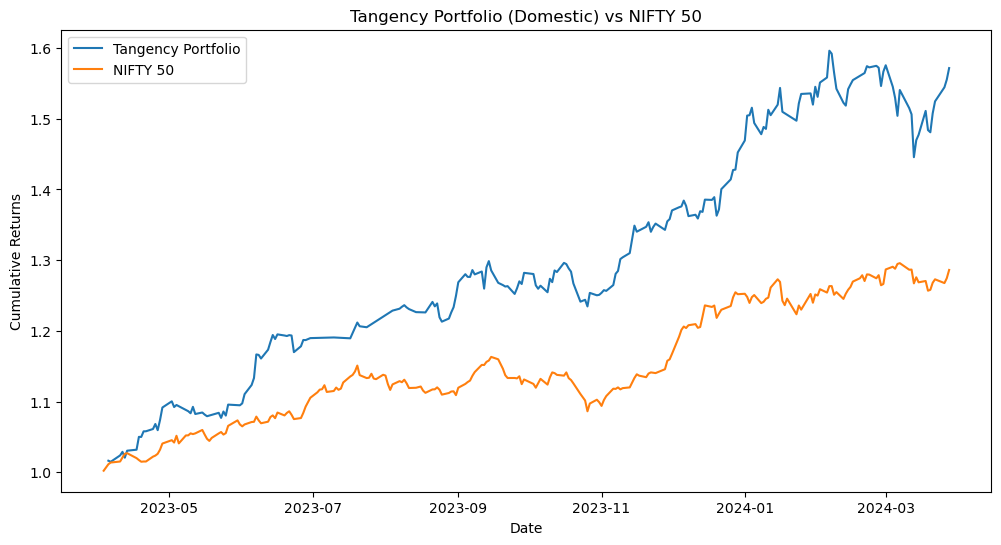

In [101]:
plt.figure(figsize=(12,6))
plt.plot(tangency_cumulative_returns, label='Tangency Portfolio')
plt.plot(index_cumm_returns, label='NIFTY 50')
plt.title('Tangency Portfolio (Domestic) vs NIFTY 50')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

-----------------------

### Short Selling (Domestic)
-----------

In [102]:
def gen_weights(N):
    weights = np.random.uniform(-1, 1, N)
    # Normalize the weights to ensure they sum to 1
    return weights / np.sum(np.abs(weights)) 

def calculate_returns(weights,log_rets):
    return np.sum(log_rets.mean()*weights) * 252

def calculate_volatility(weights,log_rets_cov):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [103]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(10000):
    # This may take awhile!
    weights = gen_weights(N=8)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights,log_rets))
    mc_portfolio_vol.append(calculate_volatility(weights,log_rets_cov))

In [104]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

In [105]:
expected_returns_range = np.linspace(0.25, 0.7, 100)  # Adjusted based on your data
bounds = tuple((-1, 1) for _ in range(N))  # Assuming no short-selling
frontier_volatility = []
frontier_weights = []

for possible_return in expected_returns_range:
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
                    {'type': 'eq', 'fun': lambda weights: calculate_returns(weights, log_rets) - possible_return})

    result = minimize(calculate_volatility, equal_weights, args=(log_rets_cov,), bounds=bounds, constraints=constraints)
    frontier_volatility.append(result['fun'])
    frontier_weights.append(result['x'])

risk_free_rate = 0.068  # Risk-free rate
frontier_sharpe_ratios = [(ret - risk_free_rate) / vol for ret, vol in zip(expected_returns_range, frontier_volatility)]


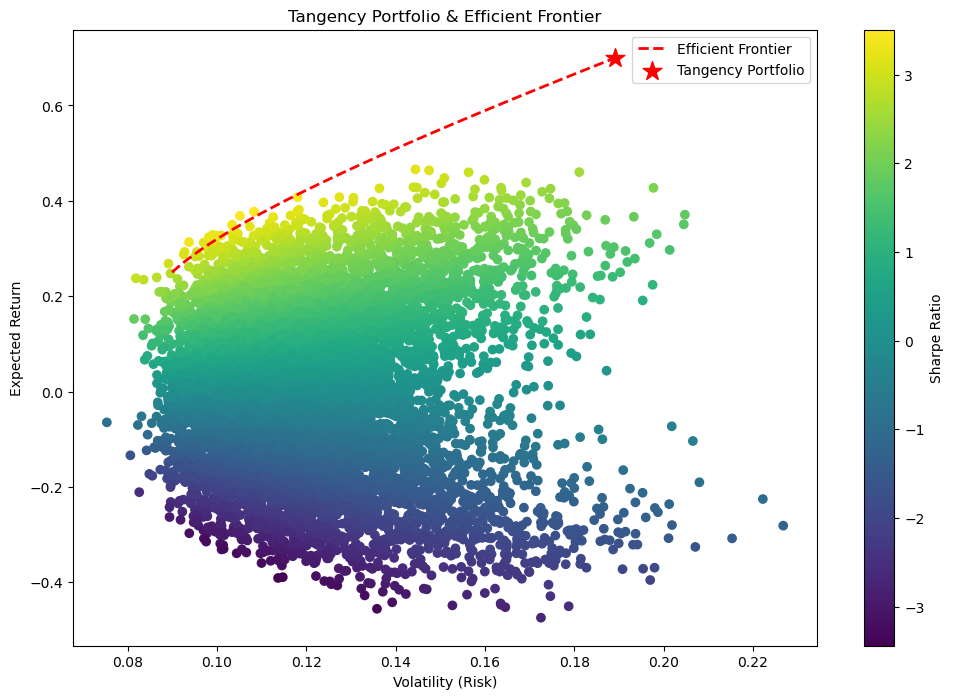

Tangency Portfolio Return: 0.7
Tangency Portfolio Volatility: 0.18923143991045044
Maximum Sharpe Ratio: 3.339825561223229


In [106]:
plt.figure(figsize=(12, 8))
plt.scatter(mc_portfolio_vol, mc_portfolio_returns, c=mc_sharpe_ratios, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')

# Plot the Efficient Frontier
plt.plot(frontier_volatility, expected_returns_range, 'r--', linewidth=2, label='Efficient Frontier')

# Tangency Portfolio Calculation
risk_free_rate = 0.068  

# Find the index of the maximum Sharpe ratio on the efficient frontier
max_sharpe_idx = np.argmax(frontier_sharpe_ratios)
tangency_volatility = frontier_volatility[max_sharpe_idx]
tangency_return = expected_returns_range[max_sharpe_idx]


# Highlight the Tangency Portfolio on the Efficient Frontier
plt.scatter(tangency_volatility, tangency_return, color='red', marker='*', s=200, label='Tangency Portfolio')

# Plot labels and legend
plt.legend()
plt.title('Tangency Portfolio & Efficient Frontier')
plt.show()

# Output Tangency Portfolio details
print(f"Tangency Portfolio Return: {tangency_return}")
print(f"Tangency Portfolio Volatility: {tangency_volatility}")
print(f"Maximum Sharpe Ratio: {frontier_sharpe_ratios[max_sharpe_idx]}")

In [107]:
tangency_volatility

0.18923143991045044

In [108]:
tangency_return

0.7

In [109]:

tangency_weights = frontier_weights[max_sharpe_idx]
tangency_weights

# tangency_weights = mc_weights[np.argmax(mc_sharpe_ratios)]
# tangency_weights

array([ 0.16275523, -0.00677906,  0.33677106,  0.48674238, -0.03369948,
        0.29793379, -0.20713192, -0.036592  ])

### Tangency Portfolio vs NIFTY 50

In [110]:
weighted_returns = log_rets * tangency_weights
tangency_portfolio_daily_returns = weighted_returns.sum(axis=1)
tangency_cumulative_returns = (1 + tangency_portfolio_daily_returns).cumprod()

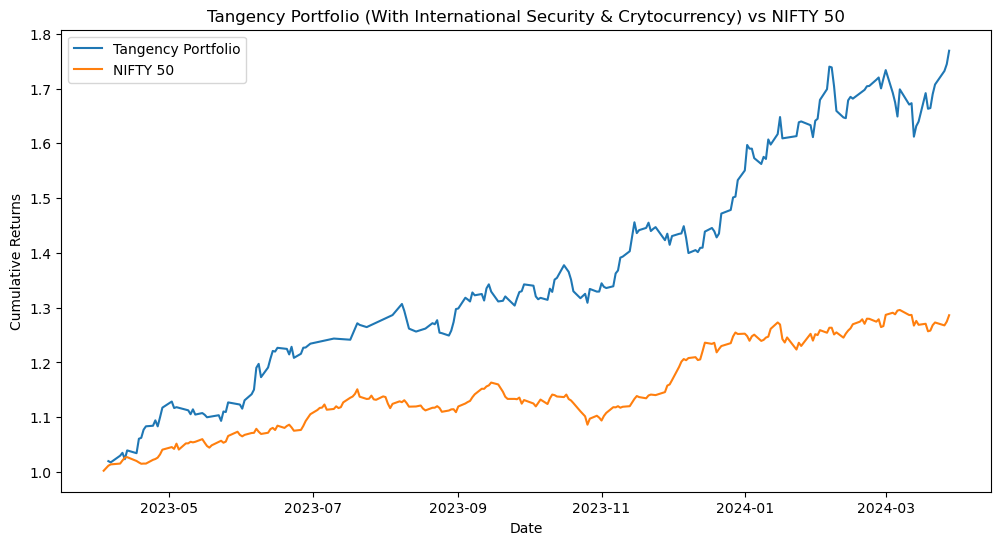

In [111]:
plt.figure(figsize=(12,6))
plt.plot(tangency_cumulative_returns, label='Tangency Portfolio')
plt.plot(index_cumm_returns, label='NIFTY 50')
plt.title('Tangency Portfolio (With International Security & Crytocurrency) vs NIFTY 50')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()